# Paired T-Test for Equivalence

In [1]:
import numpy as np
import statsmodels.stats.weightstats as ws

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams

%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,5
rcParams['font.size'] = 15
sns.set()

# Paired T-test for Equivalence (statsmodels.stats.weightstats.ttost_paired)

**Reference:**

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttost_paired.html

statsmodels.stats.weightstats.ttost_paired(x1, x2, low, upp, transform=None, weights=None)

test of (non-)equivalence for two dependent, paired sample

TOST: two one-sided t tests

null hypothesis: md < low or md > upp alternative hypothesis: low < md < upp

where md is the mean, expected value of the difference x1 - x2

If the pvalue is smaller than a threshold,say 0.05, then we reject the hypothesis that the difference between the two samples is larger than the the thresholds given by low and upp.

In [3]:
def run_ttost_paired(ctrl,test):
    # we use lower/upper bounds as control_mean +/- 1.96 control_std_dev
    mean = np.mean(ctrl)
    std = np.std(ctrl)
    lower = -1.96 * std
    upper = +1.96 * std
    print(mean, std, lower, upper)
    p, t1, t2 = ws.ttost_paired(x1=ctrl, x2=test, low=lower, upp=upper)
    if p < 0.05:
        msg = '---> Reject null hypothesis: m1 - m2 < low or m1 - m2 > upp. Accept alternative hypothesis: low < m1 - m2 < upp'
    else:
        msg = '---> No conclusion (cannot reject)'
    print('p=%.3f %s' % (p, msg))

0.1231239714755571 2.3987958602731703 -4.701639886135414 4.701639886135414
p=0.001 Reject null hypothesis: m1 - m2 < low or m1 - m2 > upp. Accept alternative hypothesis: low < m1 - m2 < upp


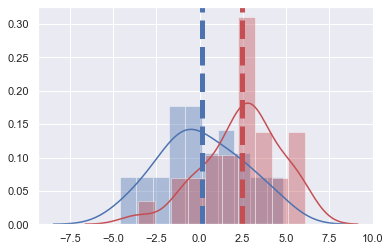

In [4]:
ctrl_std_dev = 2.0
n = 30  # for paired the n's need to match

ctrl = np.random.normal(0.0, ctrl_std_dev, n)
test = np.random.normal(2.7, ctrl_std_dev, n)
run_ttost_paired(ctrl, test)

plt.figure()
ax1 = sns.distplot(color='b', bins=10, kde=True, norm_hist=True, a=ctrl)
ax2 = sns.distplot(color='r', bins=10, kde=True, norm_hist=True, a=test)
plt.axvline(color='b', linestyle='dashed', linewidth=5, x=np.mean(ctrl))
plt.axvline(color='r', linestyle='dashed', linewidth=5, x=np.mean(test))

#### Some example results
The difference in mean between Control and Test is varied to determine where the test indicates "reject".
We explore two different values of "n" and two different standard deviations.


| std dev | n    | no conclusion | reject | reject | no conclusion |
| ---     | ---  |  ---:         | :---   | ---:   | :---          |
| 1.0     |
|         | 3000 | -2.0 | -1.9 | 1.9 | 2.0 |
|         | 30   | -1.9 | -1.2 | 1.2 | 1.9 |
| 2.0     |
|         | 3000 | -3.9 | -3.8 | 3.8 | 3.9 |
|         | 30   | -3.7 | -2.7 | 2.7 | 3.7 |
